# Data Science Intern at Let's Grow More LGMVIP Feb-22

### Beginner Level Task

## Iris Flowers Classification ML Project :

    This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.
    
### Sanskriti Jain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
le=LabelEncoder()

In [7]:
df['Target']=le.fit_transform(df['Species'])

In [8]:
#df.drop(['Id'], axis=1, inplace=true)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [9]:
X=df.drop(["Id", 'Species', 'Target'], axis=1)
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=101)

# Method 1: Decision Trees

In [10]:
model=DecisionTreeClassifier(max_depth=4, max_features='auto')

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [12]:
y_pred=model.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

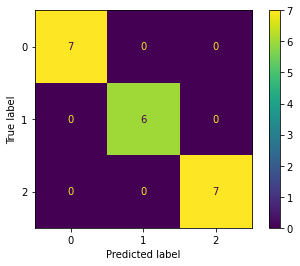

In [14]:
plot_confusion_matrix(model, X_test, y_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [16]:
from sklearn.tree import plot_tree

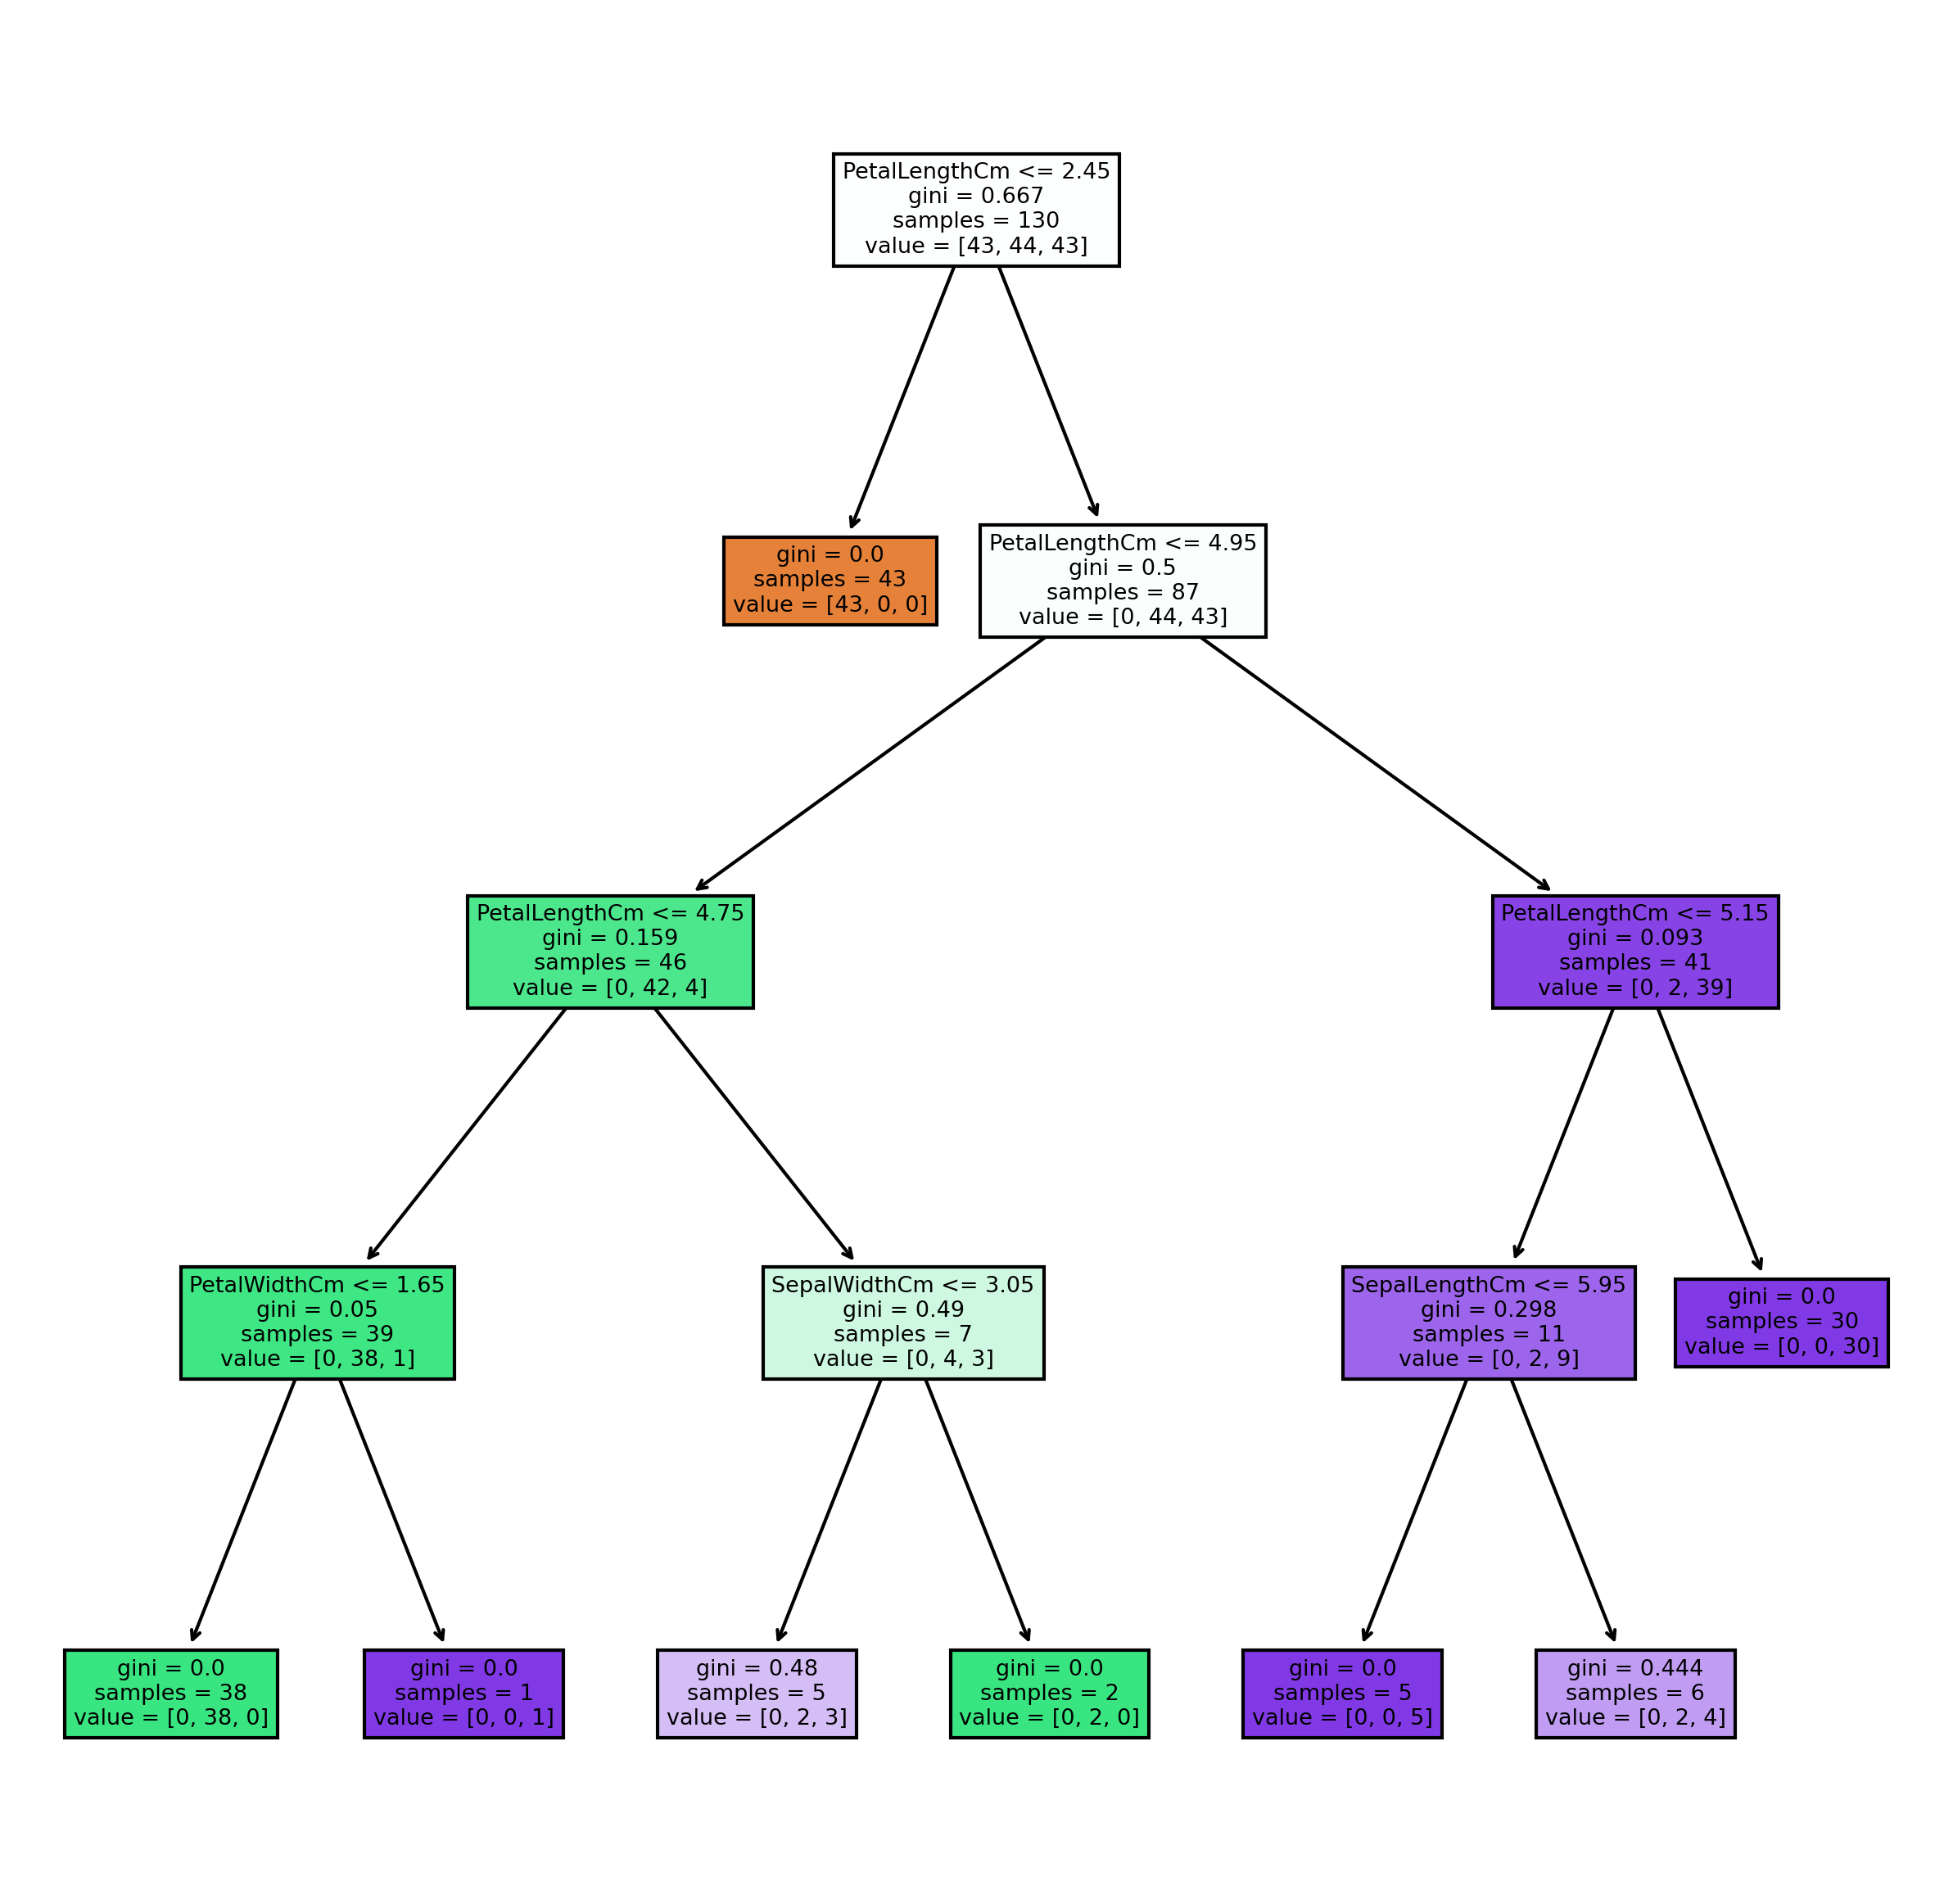

In [17]:
plt.figure(figsize=(10,10), dpi=300)
plot_tree(model, filled=True, feature_names=X.columns);

In [19]:
## Testing
y_pred2=model.predict([[5.0,9,1.2,3.2]])

if y_pred2==[0]:
    print("Iris-setosa")
elif y_pred==[1]:
    print("Iris-versicolor")
else:
    print("Iris-virginica")  

Iris-setosa


# Method 2: KNN

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [21]:
X_train, X_test, y_train , y_test= train_test_split(X,y, test_size=0.2, random_state=101)
scaler=StandardScaler()

In [22]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [23]:
model=KNeighborsClassifier(n_neighbors=3)

In [24]:
model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred= model.predict(scaled_X_test)

<AxesSubplot:>

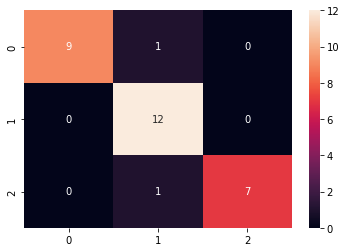

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [28]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [29]:
test_errors_rate=[]
accuracy_scores=[]
for k in range(1, 20):
    knn_model= KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred= knn_model.predict(scaled_X_test)
    accuracyscore=accuracy_score(y_test, y_pred)
    test_error=1-accuracy_score(y_test, y_pred)
    test_errors_rate.append(test_error)
    accuracy_scores.append(accuracyscore)

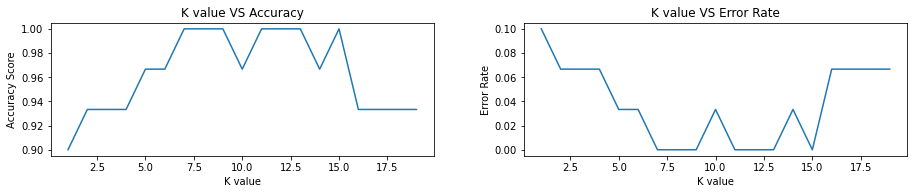

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,20), accuracy_scores)
plt.xlabel("K value")
plt.ylabel("Accuracy Score")
plt.title("K value VS Accuracy")
plt.tight_layout(pad=9)

plt.subplot(1,2,2)
plt.plot(np.arange(1,20), test_errors_rate)
plt.xlabel("K value")
plt.ylabel("Error Rate")
plt.title("K value VS Error Rate")
plt.show()

## Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

In [32]:
k=[i for i in (1,31)]
params={"n_neighbors": k, "metric":['minkowski', 'eucledian']}

In [33]:
grid_model = GridSearchCV(estimator =model, param_grid=params, cv =5)
grid=grid_model.fit(scaled_X_train, y_train)

In [34]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 1}

In [35]:
grid.best_score_

0.9416666666666668

In [36]:
Knn=KNeighborsClassifier(n_neighbors=1)
Knn.fit(scaled_X_train, y_train)
Y_pred_1= Knn.predict(scaled_X_test)
accuracy_score(y_test, Y_pred_1)

0.9